# Import packages

In [104]:
import matplotlib.pyplot as plt

import spacy
from tqdm import tqdm_notebook as tqdm

import pandas as pd
import numpy as np


import en_core_web_sm
nlp = en_core_web_sm.load()
from spacy import displacy

# import Counter for counting:
from collections import Counter

# Read data

In [ ]:
dataset=pd.read_csv(r"C:\Users\chriq\OneDrive\Documents\my_data\Textminingdata\text_financial\minutes_spy.csv", parse_dates=['date'])

In [5]:
dataset['contents'] = dataset['contents'].apply(lambda x: x.replace('\n\n[SECTION]\n\n', '').replace('\n', ' ').replace('\r', ' ').strip())


# The following function extract all the different entities and labels present in the text

In [6]:
def dataset_parsing():
    '''
  This function calls the MonetaryPolicyCommittee module of the FedTools package
  to collect FOMC Statements. These statements are parsed using SpaCy.

  Inputs: N/A.

  Outputs: dataset: a Pandas DataFrame which contains:

  'FOMC_Statements' - original FOMC Statements downloaded by FedTools.
  'tokenised_data' - tokenised FOMC Statements.
  'lemmatised_data' - lematised FOMC Statements.
  'part_of_speech' - part of speech tags from FOMC Statements.
  'named_entities' - the named entities detected within the FOMC Statements.
  'labels' - the corresponding labels associated with named_entities.
  'number_of_labels' - a dictionary displaying the number of each label detected.
  'items' - the number of times each item is detected within the FOMC Statements.

  '''

  # collect FOMC Statements into DataFrame called dataset:
    global dataset

    # remove additional operators within the text:


    # initialise empty lists:
    tokens = []
    lemma = []
    pos = []
    ents = []
    labels = []
    count = []
    items = []

  # for each document in the pipeline:
    for doc in tqdm(nlp.pipe(dataset['contents'].astype('unicode').values, batch_size=50)):
      # if the document is successfully parsed:
        if doc.is_parsed:
          # append various data to appropriate categories:
            tokens.append([n.text for n in doc])
            lemma.append([n.lemma_ for n in doc])
            pos.append([n.pos_ for n in doc])
            ents.append([n.text for n in doc.ents])
            labels.append([n.label_ for n in doc.ents])
            count.append(Counter([n.label_ for n in doc.ents]))
            items.append(Counter([n.text for n in doc.ents]))

      # if document parsing fails, return 'None' to maintain DataFrame dimensions:
        else:
            tokens.append(None)
            lemma.append(None)
            pos.append(None)
            ents.append(None)
            labels.append(None)
            count.append(None)
            items.append(None)

  # now assign the lists columns within the dataframe:
    dataset['tokenised_data'] = tokens
    dataset['lemmatised_data'] = lemma
    dataset['part_of_speech'] = pos
    dataset['named_entities'] = ents
    dataset['labels'] = labels
    dataset['number_of_labels'] = count
    dataset['items'] = items

    return dataset

In [7]:
dataset_parsing()

<ipython-input-6-99511f8aa2aa>:37: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for doc in tqdm(nlp.pipe(dataset['contents'].astype('unicode').values, batch_size=50)):


0it [00:00, ?it/s]

<ipython-input-6-99511f8aa2aa>:39: DeprecationWarning: [W107] The property `Doc.is_parsed` is deprecated. Use `Doc.has_annotation("DEP")` instead.
  if doc.is_parsed:


,Unnamed: 0,date,contents,speaker,title,SPY: d-1,SPY: d+0,SPY: d+1,SPY: d+2,SPY: d+3,...,SPY: d+12,SPY: d+13,SPY: d+14,tokenised_data,lemmatised_data,part_of_speech,named_entities,labels,number_of_labels,items
0,0,1993-02-03,A meeting of the Federal Open Market Committee...,Alan Greenspan,FOMC Meeting Minutes,25.864319,26.137705,26.247076,26.228842,26.228842,...,25.499762,25.481527,25.809631,"[A, meeting, of, the, Federal, Open, Market, C...","[a, meeting, of, the, Federal, Open, Market, C...","[DET, NOUN, ADP, DET, PROPN, PROPN, PROPN, PRO...","[the Federal Open Market Committee, the Board ...","[ORG, ORG, ORG, GPE, GPE, DATE, TIME, DATE, TI...","{'ORG': 261, 'GPE': 42, 'DATE': 190, 'TIME': 2...","{'the Federal Open Market Committee': 5, 'the ..."
1,1,1993-03-23,A meeting of the Federal Open Market Committee...,Alan Greenspan,FOMC Meeting Minutes,26.242840,26.297781,26.297781,26.462601,26.316103,...,25.949833,26.316103,26.371027,"[A, meeting, of, the, Federal, Open, Market, C...","[a, meeting, of, the, Federal, Open, Market, C...","[DET, NOUN, ADP, DET, PROPN, PROPN, PROPN, PRO...","[the Federal Open Market Committee, the Board ...","[ORG, ORG, ORG, GPE, GPE, DATE, DATE, TIME, PE...","{'ORG': 80, 'GPE': 40, 'DATE': 142, 'TIME': 2,...","{'the Federal Open Market Committee': 1, 'the ..."
2,2,1993-05-18,A meeting of the Federal Open Market Committee...,Alan Greenspan,FOMC Meeting Minutes,25.876574,25.858263,26.389343,26.462601,26.224524,...,26.535849,26.444286,26.206215,"[A, meeting, of, the, Federal, Open, Market, C...","[a, meeting, of, the, Federal, Open, Market, C...","[DET, NOUN, ADP, DET, PROPN, PROPN, PROPN, PRO...","[the Federal Open Market Committee, the Board ...","[ORG, ORG, ORG, GPE, GPE, DATE, DATE, DATE, TI...","{'ORG': 75, 'GPE': 34, 'DATE': 125, 'TIME': 4,...","{'the Federal Open Market Committee': 1, 'the ..."
3,3,1993-07-07,A meeting of the Federal Open Market Committee...,Alan Greenspan,FOMC Meeting Minutes,26.096848,26.170630,26.465719,26.539494,26.521049,...,26.391937,26.539494,26.521049,"[A, meeting, of, the, Federal, Open, Market, C...","[a, meeting, of, the, Federal, Open, Market, C...","[DET, NOUN, ADP, DET, PROPN, PROPN, PROPN, PRO...","[the Federal Open Market Committee, the Board ...","[ORG, ORG, ORG, GPE, GPE, DATE, TIME, DATE, TI...","{'ORG': 109, 'GPE': 38, 'DATE': 223, 'TIME': 5...","{'the Federal Open Market Committee': 1, 'the ..."
4,4,1993-08-17,A meeting of the Federal Open Market Committee...,Alan Greenspan,FOMC Meeting Minutes,26.779249,26.871473,27.019001,27.019001,27.037451,...,27.350975,27.369415,27.184986,"[A, meeting, of, the, Federal, Open, Market, C...","[a, meeting, of, the, Federal, Open, Market, C...","[DET, NOUN, ADP, DET, PROPN, PROPN, PROPN, PRO...","[the Federal Open Market Committee, the Board ...","[ORG, ORG, ORG, GPE, GPE, DATE, TIME, PERSON, ...","{'ORG': 80, 'GPE': 35, 'DATE': 137, 'TIME': 2,...","{'the Federal Open Market Committee': 1, 'the ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,219,2021-07-28,"The Federal Reserve, the central bank of the U...",Jerome Powell,FOMC Meeting Minutes,436.076019,435.897217,437.705048,435.579346,434.665497,...,442.939850,443.982819,441.072418,"[The, Federal, Reserve, ,, the, central, bank,...","[the, Federal, Reserve, ,, the, central, bank,...","[DET, PROPN, PROPN, PUNCT, DET, ADJ, NOUN, ADP...","[The Federal Reserve, the United States, Pract...","[ORG, GPE, ORG, ORG, ORG, WORK_OF_ART, ORG, OR...","{'ORG': 272, 'GPE': 39, 'WORK_OF_ART': 5, 'CAR...","{'The Federal Reserve': 1, 'the United States'..."
220,220,2021-09-22,"The Federal Reserve, the central bank of the U...",Jerome Powell,FOMC Meeting Minutes,432.111908,436.327057,441.628448,442.355896,441.090363,...,436.327057,433.168182,432.101929,"[The, Federal, Reserve, ,, the, central, bank,...","[the, Federal, Reserve, ,, the, central, bank,...","[DET, PROPN, PROPN, PUNCT, DET, ADJ, NOUN, ADP...","[The Federal Reserve, the United States,

# Creates column containing information about the extracted features 

In [11]:
def generate_additional_information():
    '''
  This function generates additional information from the parsed documents, quantifying
  the usage of specific named entities within FOMC Statements.

  Inputs: N/A.

  Outputs: dataset: a Pandas DataFrame which contains:

  'person' - the number of times people are mentioned in each statement.
  'date' - the number of times dates are mentioned within each statement.
  'percent' - the number of times percentages are mentioned within each statement.
  'time' - the number of times a time is mentioned within each statement.
  'ordinal' - the number of times an 'ordinal' ie) "first" is mentioned within each statement.
  'organisations' - the number of times an organisation is mentioned within each statement.
  'money' - the number of times money is mentioned within each statement.
  'event' - the number of times an event is mentioned within each statement.
  'law' - the number of times a law is mentioned within each statement.
  'quantity' - the number of times a quantity is mentioned within each statement.
  'groups' - the number of times specific groups are mentioned within each statement.
  'information_content' -  the number of named entities detected within each statement.

  '''
  # call the function defined above:
    global dataset

  # generate additional information through the detection of named entities:
    dataset['person'] = dataset['number_of_labels'].apply(lambda x: x.get('PERSON'))
    dataset['nb_dates'] = dataset['number_of_labels'].apply(lambda x: x.get('DATE'))
    dataset['percent'] = dataset['number_of_labels'].apply(lambda x: x.get('PERCENT'))
    dataset['product'] = dataset['number_of_labels'].apply(lambda x: x.get('PRODUCT'))
    dataset['time'] = dataset['number_of_labels'].apply(lambda x: x.get('TIME'))
    dataset['ordinal'] = dataset['number_of_labels'].apply(lambda x: x.get('ORDINAL'))
    dataset['organisations'] = dataset['number_of_labels'].apply(lambda x: x.get('ORG'))
    dataset['money'] = dataset['number_of_labels'].apply(lambda x: x.get('MONEY'))
    dataset['event'] = dataset['number_of_labels'].apply(lambda x: x.get('EVENT'))
    dataset['law'] = dataset['number_of_labels'].apply(lambda x: x.get('LAW'))
    dataset['quantity'] = dataset['number_of_labels'].apply(lambda x: x.get('QUANTITY'))
    dataset['groups'] = dataset['number_of_labels'].apply(lambda x: x.get('NORP'))

    # replace any 'NaN' values with 0, then calculate the 'information content',as defined
    # by the total number of named entities:
    dataset = dataset.replace(np.nan, 0)
    dataset['information_content'] = dataset.iloc[:,8:].sum(axis = 1)

    return dataset

In [12]:
dataset=generate_additional_information()

<ipython-input-11-d67e21a613b4>:44: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dataset['information_content'] = dataset.iloc[:,8:].sum(axis = 1)


## This is a nice display of the text using the models tools

In [15]:
displacy.render(nlp(dataset['contents'][103]), jupyter = True, style = 'ent')

# Create the label, did  the S&P go up or down a week after the announcement 

In [37]:
def pct_change_from_day_0(announcement):
    try: 
        pct_change= (announcement['SPY: d+7']/announcement['SPY: d-1'])-1
        if pct_change>0:
            return 1
        else:
            return 0
    except: 
        return None
pct_change_from_day_0(dataset.iloc[141])

dataset['+7change']=dataset.apply(pct_change_from_day_0,axis=1)

In [46]:
newdata = dataset.select_dtypes(include='number')

In [48]:
newdata.columns

Index(['Unnamed: 0', 'SPY: d-1', 'SPY: d+0', 'SPY: d+1', 'SPY: d+2',
       'SPY: d+3', 'SPY: d+4', 'SPY: d+5', 'SPY: d+6', 'SPY: d+7', 'SPY: d+8',
       'SPY: d+9', 'SPY: d+10', 'SPY: d+11', 'SPY: d+12', 'SPY: d+13',
       'SPY: d+14', 'person', 'nb_dates', 'percent', 'product', 'time',
       'ordinal', 'organisations', 'money', 'event', 'law', 'quantity',
       'groups', 'information_content', '+7change'],
      dtype='object')

In [49]:
input_data=newdata[['SPY: d+0','person', 'nb_dates', 'percent', 'product', 'time',
       'ordinal', 'organisations', 'money', 'event', 'law', 'quantity',
       'groups', 'information_content']]

In [51]:
input_data.to_numpy()

array([[2.61377048e+01, 5.60000000e+01, 1.90000000e+02, ...,
        1.00000000e+00, 9.00000000e+00, 9.04014694e+02],
       [2.62977810e+01, 2.80000000e+01, 1.42000000e+02, ...,
        0.00000000e+00, 3.00000000e+00, 6.07900555e+02],
       [2.58582630e+01, 3.90000000e+01, 1.25000000e+02, ...,
        0.00000000e+00, 3.00000000e+00, 6.01544861e+02],
       ...,
       [4.63093048e+02, 8.80000000e+01, 1.57000000e+02, ...,
        0.00000000e+00, 6.00000000e+00, 6.57544879e+03],
       [4.68952454e+02, 9.70000000e+01, 1.66000000e+02, ...,
        0.00000000e+00, 9.00000000e+00, 6.68857001e+03],
       [4.33380005e+02, 1.02000000e+02, 1.83000000e+02, ...,
        0.00000000e+00, 6.00000000e+00, 6.66410007e+03]])

In [95]:
labels=dataset['+7change'].to_numpy()
labels_onehot=pd.get_dummies(labels).values

# Split the data into train, validation and test data, so that it can train a neural network

In [96]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(input_data.to_numpy(),labels_onehot,train_size=0.9)
print (len(X_train),len(X_test),len(y_train),len(y_test))

201 23 201 23


In [97]:
X_train_m, X_val, y_train_m, y_val = train_test_split(X_train,y_train,train_size=0.9)
print (len(X_train_m),len(X_val),len(y_train_m),len(y_val))

180 21 180 21


In [98]:
X_train[0]

array([1.05029984e+02, 7.50000000e+01, 1.36000000e+02, 3.00000000e+00,
       0.00000000e+00, 2.00000000e+00, 0.00000000e+00, 1.37000000e+02,
       3.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
       1.10000000e+01, 1.76686527e+03])

In [101]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout, SpatialDropout1D
from tensorflow.keras.layers import Embedding
from keras.layers import Dense, Dropout, BatchNormalization
model = Sequential()

model.add(LSTM(units = 50, return_sequences = True, input_shape = (14,1)))
model.add(Dropout(0.2))
model.add(BatchNormalization())


model.add(LSTM(units = 50))
model.add(Dropout(0.25))
model.add(BatchNormalization())

model.add(Dense(2, activation='sigmoid'))

model.compile(optimizer = 'adam', loss = 'mean_squared_error',metrics=['accuracy'])

history=model.fit(X_train_m, y_train_m,validation_data=(X_val,y_val), epochs = 30, batch_size = 100)

Epoch 1/30
2/2 [==============================] - 2s 444ms/step - loss: 0.3159 - accuracy: 0.4556 - val_loss: 0.2982 - val_accuracy: 0.1429
Epoch 2/30
2/2 [==============================] - 0s 30ms/step - loss: 0.2858 - accuracy: 0.5389 - val_loss: 0.2945 - val_accuracy: 0.1429
Epoch 3/30
2/2 [==============================] - 0s 40ms/step - loss: 0.3036 - accuracy: 0.4889 - val_loss: 0.2966 - val_accuracy: 0.1429
Epoch 4/30
2/2 [==============================] - 0s 31ms/step - loss: 0.2944 - accuracy: 0.5111 - val_loss: 0.2958 - val_accuracy: 0.1429
Epoch 5/30
2/2 [==============================] - 0s 30ms/step - loss: 0.2777 - accuracy: 0.5944 - val_loss: 0.2918 - val_accuracy: 0.1429
Epoch 6/30
2/2 [==============================] - 0s 32ms/step - loss: 0.2904 - accuracy: 0.5222 - val_loss: 0.2885 - val_accuracy: 0.1429
Epoch 7/30
2/2 [==============================] - 0s 30ms/step - loss: 0.2836 - accuracy: 0.5222 - val_loss: 0.2843 - val_accuracy: 0.1429
Epoch 8/30
2/2 [==========

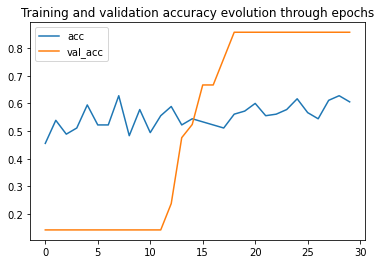

In [102]:
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.title('Training and validation accuracy evolution through epochs')
plt.legend()
plt.show()

## Results on the test set

In [103]:
model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 19ms/step - loss: 0.2398 - accuracy: 0.6522


[0.23980966210365295, 0.6521739363670349]